In [1]:
import numpy as np 
import matplotlib.pyplot as plt

stressid = 0
stresss = ['stress_elas_pos', 'stress_inter_v1']
phis = ['504', '610', '706', '811', '987', '1190', '1513']
shearrates = ['937237e-03', '1405855e-02', '1874474e-02', '3748948e-02']

def getstressxy(phi, shearrate):
    path = '/Users/andrewliu/remote_disk/Data/phi_{0}_rate_{1}/data/{2}.dat'.format(phis[phi], shearrates[shearrate], stresss[stressid])
    #path = '/Users/andrewliu/remote_disk/RBC_omp_doublet/Data/phi_{0}_rate_{1}/data/{2}.dat'.format(phis[phi], shearrates[shearrate], stresss[stressid])
    stress_xy = []
    with open(path) as f:
        for index, line in enumerate(f):
            #if index > 200:
            if index > 0:
                stress_xy.append(float(line.split()[1]))
                #stress_xy.append(float(line.split()[0]) - float(line.split()[1]))
    return stress_xy

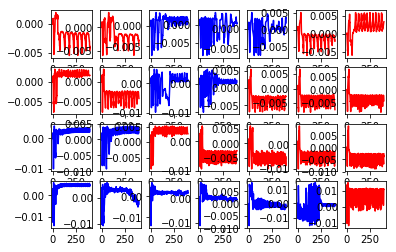

In [4]:
colors = ['red', 'blue'] # doublet: red, one-file: blue
doublet_pairs = [[0, 0], [1, 0], [5, 0], [6, 0], [0, 1], [1, 1], [4, 1], [5, 1], [6, 1], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [6, 3]]
doublet_matrix = np.zeros((len(phis), len(shearrates)))
for pair in doublet_pairs:
    doublet_matrix[pair[0], pair[1]] = 1 
    
plt.figure()
for i in range(len(phis)):
    for j in range(len(shearrates)):
        result = getstressxy(i, j)
        plt.subplot(4, 7, 7*j+i+1)
        if doublet_matrix[i, j] > 0: colorr = colors[0]
        else: colorr = colors[1]
        plt.plot(np.arange(len(result)), result, color = colorr)
plt.show()

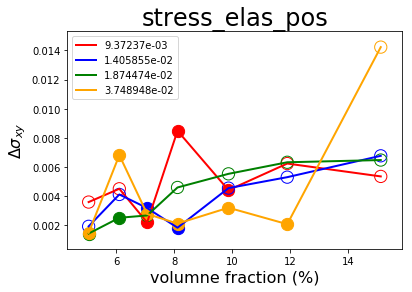

In [2]:
stress_xy_diff = np.zeros((len(phis), len(shearrates)))

for i in range(len(phis)):
    for j in range(len(shearrates)):
        result = getstressxy(i, j)[-100:]
        stress_xy_diff[i, j] = abs(max(result) - min(result))

doublet_pairs = [[0, 0], [1, 0], [5, 0], [6, 0], [0, 1], [1, 1], [4, 1], [5, 1], [6, 1], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [6, 3]]
doublet_matrix = np.zeros((len(phis), len(shearrates)))
for pair in doublet_pairs:
    doublet_matrix[pair[0], pair[1]] = 1

colors = ['red', 'blue', 'green', 'orange']
phis_numerical = np.array([float(phi)*0.01 for phi in phis])

for index, shearrate in enumerate(shearrates):
    plt.plot(phis_numerical, stress_xy_diff[:, index], label = shearrate[0]+'.'+shearrate[1:], color = colors[index], lw = 2)
    doublet_id = [flag_index for flag_index, i in enumerate(doublet_matrix[:, index]) if i > 0]
    plt.scatter(phis_numerical[doublet_id], stress_xy_diff[doublet_id, index], s = 150, facecolors = 'none', edgecolors = colors[index])
    onefile_id = [flag_index for flag_index, i in enumerate(doublet_matrix[:, index]) if i < 1]
    plt.scatter(phis_numerical[onefile_id], stress_xy_diff[onefile_id, index], s = 150, facecolors = colors[index], edgecolors = colors[index])

plt.xlabel('volumne fraction (%)', fontsize = 16)
plt.ylabel(r'$\Delta \sigma _{xy}$', fontsize = 16)
#plt.title(r'$\sigma _{xy} vs \phi$', fontsize = 24)
plt.title(stresss[stressid], fontsize = 24)
plt.legend(loc = 0)
plt.show()

In [ ]:
stress_xy_avg = np.zeros((len(phis), len(shearrates)))
stress_xy_rms = np.zeros((len(phis), len(shearrates)))
for i in range(len(phis)):
    for j in range(len(shearrates)):
        result = getstressxy(i, j)
        stress_xy_avg[i, j] = np.average(result)
        stress_xy_rms[i, j] = np.sqrt(np.mean(np.array(result)**2))

doublet_pairs = [[0, 0], [1, 0], [5, 0], [6, 0], [0, 1], [1, 1], [4, 1], [5, 1], [6, 1], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [6, 3]]
doublet_matrix = np.zeros((len(phis), len(shearrates)))
for pair in doublet_pairs:
    doublet_matrix[pair[0], pair[1]] = 1

colors = ['red', 'blue', 'green', 'orange']
#colors = ['r', 'b', 'g', 'c']
stress_xy_rms = stress_xy_avg
phis_numerical = np.array([float(phi)*0.01 for phi in phis])
for index, shearrate in enumerate(shearrates):
    plt.plot(phis_numerical, stress_xy_rms[:, index], label = shearrate[0]+'.'+shearrate[1:], color = colors[index], lw = 2)
    doublet_id = [flag_index for flag_index, i in enumerate(doublet_matrix[:, index]) if i > 0]
    plt.scatter(phis_numerical[doublet_id], stress_xy_rms[doublet_id, index], s = 150, facecolors = 'none', edgecolors = colors[index])
    onefile_id = [flag_index for flag_index, i in enumerate(doublet_matrix[:, index]) if i < 1]
    plt.scatter(phis_numerical[onefile_id], stress_xy_rms[onefile_id, index], s = 150, facecolors = colors[index], edgecolors = colors[index])

plt.xlabel('volumne fraction (%)', fontsize = 16)
plt.ylabel(r'$\sigma _{xy}$', fontsize = 16)
#plt.ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
#plt.title(r'$\sigma _{xy} vs \phi$', fontsize = 24)
plt.title(stresss[stressid], fontsize = 24)
plt.legend(loc = 0)
plt.show()